In [1]:
import numpy as np
import optuna 
import pandas as pd

from pathlib import Path
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/home/rzhu/Loc/miniconda3/envs/kinase/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
storage_name = "sqlite:///data_egfr/msm/allfeature_studies/allfeature.db"
study_name = "lag500"
trial_key = 'random_trials'
study = optuna.load_study(study_name=study_name, storage=storage_name)
print(len(study.trials))
# study.trials_dataframe().to_hdf(f'data_egfr/msm/{study_name}.h5', key=trial_key)

52


In [4]:
hps = pd.read_hdf(f'data_egfr/msm/allfeature_studies/{study_name}.h5', key=trial_key+'_hps')
hps

,trial__no,tica__lag,tica__dim,tica__stride,trajlen__cutoff,cluster__k,cluster__maxiter,cluster__stride
0,0,82,13,10,1000,541,1000,100
1,1,40,3,10,1000,1070,1000,100
2,2,17,3,10,1000,1489,1000,100
3,3,45,17,10,1000,1195,1000,100
4,4,60,2,10,1000,1255,1000,100
5,5,33,17,10,1000,989,1000,100
6,6,88,11,10,1000,915,1000,100
7,7,69,19,10,1000,1031,1000,100
8,8,26,4,10,1000,1264,1000,100
9,9,75,6,10,1000,1026,1000,100


In [7]:
trials = pd.read_hdf(f'data_egfr/msm/allfeature_studies/{study_name}.h5', key=trial_key)
rename_cols = {'params_cluster__k' : 'n_clusters',
               'params_tica__dim' : 'tica_dim',
               'params_tica__lag' : 'tica_lag',
               'values_0' : 't2',
               'values_1' : 't3',
               'values_2' : 'gap23',
               'values_3' : 'gap34'}
trials.rename(columns=rename_cols, inplace=True)
trials.dropna(inplace=True)
trials

KeyError: 'No object named random_trials in the file'

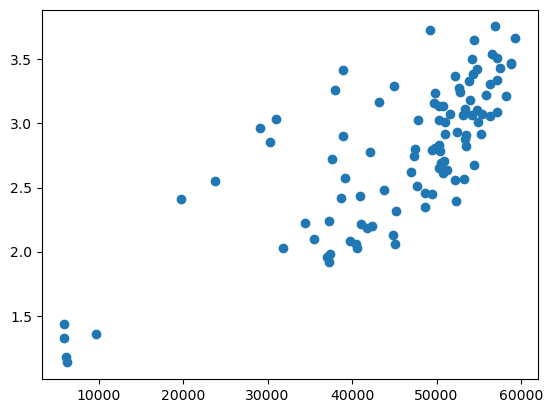

In [13]:
t2 = trials.t2.to_numpy()
gap23 = trials.gap23.to_numpy()
plt.scatter(t2,gap23)

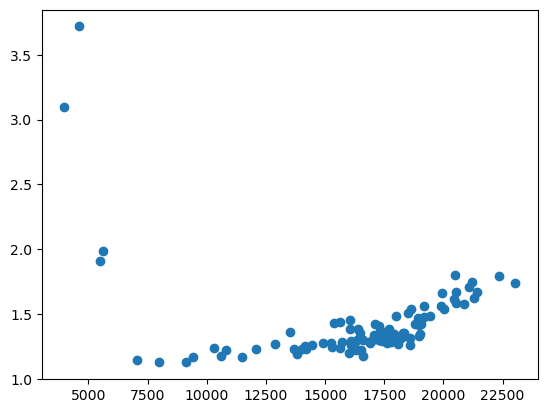

In [15]:
t3 = trials.t3.to_numpy()
gap34 = trials.gap34.to_numpy()
plt.scatter(t3,gap34)

In [16]:
trials[trials.number == trials.t2.idxmax()]

,number,t2,t3,gap23,gap34,datetime_start,datetime_complete,duration,n_clusters,tica_dim,tica_lag,state
61,61,59321.780989,16333.672418,3.669547,1.29829,2024-03-06 17:56:38.285840,2024-03-06 18:56:03.612850,0 days 00:59:25.327010,1333,15,67,COMPLETE


In [17]:
trials[trials.number == trials.gap23.idxmax()]

,number,t2,t3,gap23,gap34,datetime_start,datetime_complete,duration,n_clusters,tica_dim,tica_lag,state
34,34,56879.819185,16298.13537,3.756654,1.221323,2024-03-05 16:29:04.575003,2024-03-05 17:32:57.320989,0 days 01:03:52.745986,1430,13,24,COMPLETE
